# Week 10 - Classification

### Import Library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Import dataset

In [2]:
dataset = pd.read_csv('diabetes.csv', header=0)
dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


### Modeling

#### Menentukan variable x & Y

In [5]:
feature_cols = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
X = dataset[feature_cols] # Features
y = dataset['Outcome'] # Target Variable

#### Membagi data train & test

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

### Pruning

#### Decision Tree

In [8]:
from sklearn.tree import DecisionTreeClassifier

# Create Decision Tree Classifier object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifier
clf = clf.fit(X_train, y_train)

# Predict the response for test dataset
y_pred = clf.predict(X_test)

In [9]:
# Print model accuracy

from sklearn import metrics
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7229437229437229


#### Visualize Decision Tree

[Text(0.40053763440860213, 0.9705882352941176, 'X[1] <= 129.5\ngini = 0.449\nsamples = 537\nvalue = [354, 183]'),
 Text(0.1448252688172043, 0.9117647058823529, 'X[5] <= 26.3\ngini = 0.329\nsamples = 357\nvalue = [283, 74]'),
 Text(0.043010752688172046, 0.8529411764705882, 'X[5] <= 9.1\ngini = 0.06\nsamples = 97\nvalue = [94, 3]'),
 Text(0.021505376344086023, 0.7941176470588235, 'X[0] <= 7.5\ngini = 0.444\nsamples = 6\nvalue = [4, 2]'),
 Text(0.010752688172043012, 0.7352941176470589, 'gini = 0.0\nsamples = 4\nvalue = [4, 0]'),
 Text(0.03225806451612903, 0.7352941176470589, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.06451612903225806, 0.7941176470588235, 'X[6] <= 0.669\ngini = 0.022\nsamples = 91\nvalue = [90, 1]'),
 Text(0.053763440860215055, 0.7352941176470589, 'gini = 0.0\nsamples = 76\nvalue = [76, 0]'),
 Text(0.07526881720430108, 0.7352941176470589, 'X[6] <= 0.705\ngini = 0.124\nsamples = 15\nvalue = [14, 1]'),
 Text(0.06451612903225806, 0.6764705882352942, 'gini = 0.0\nsam

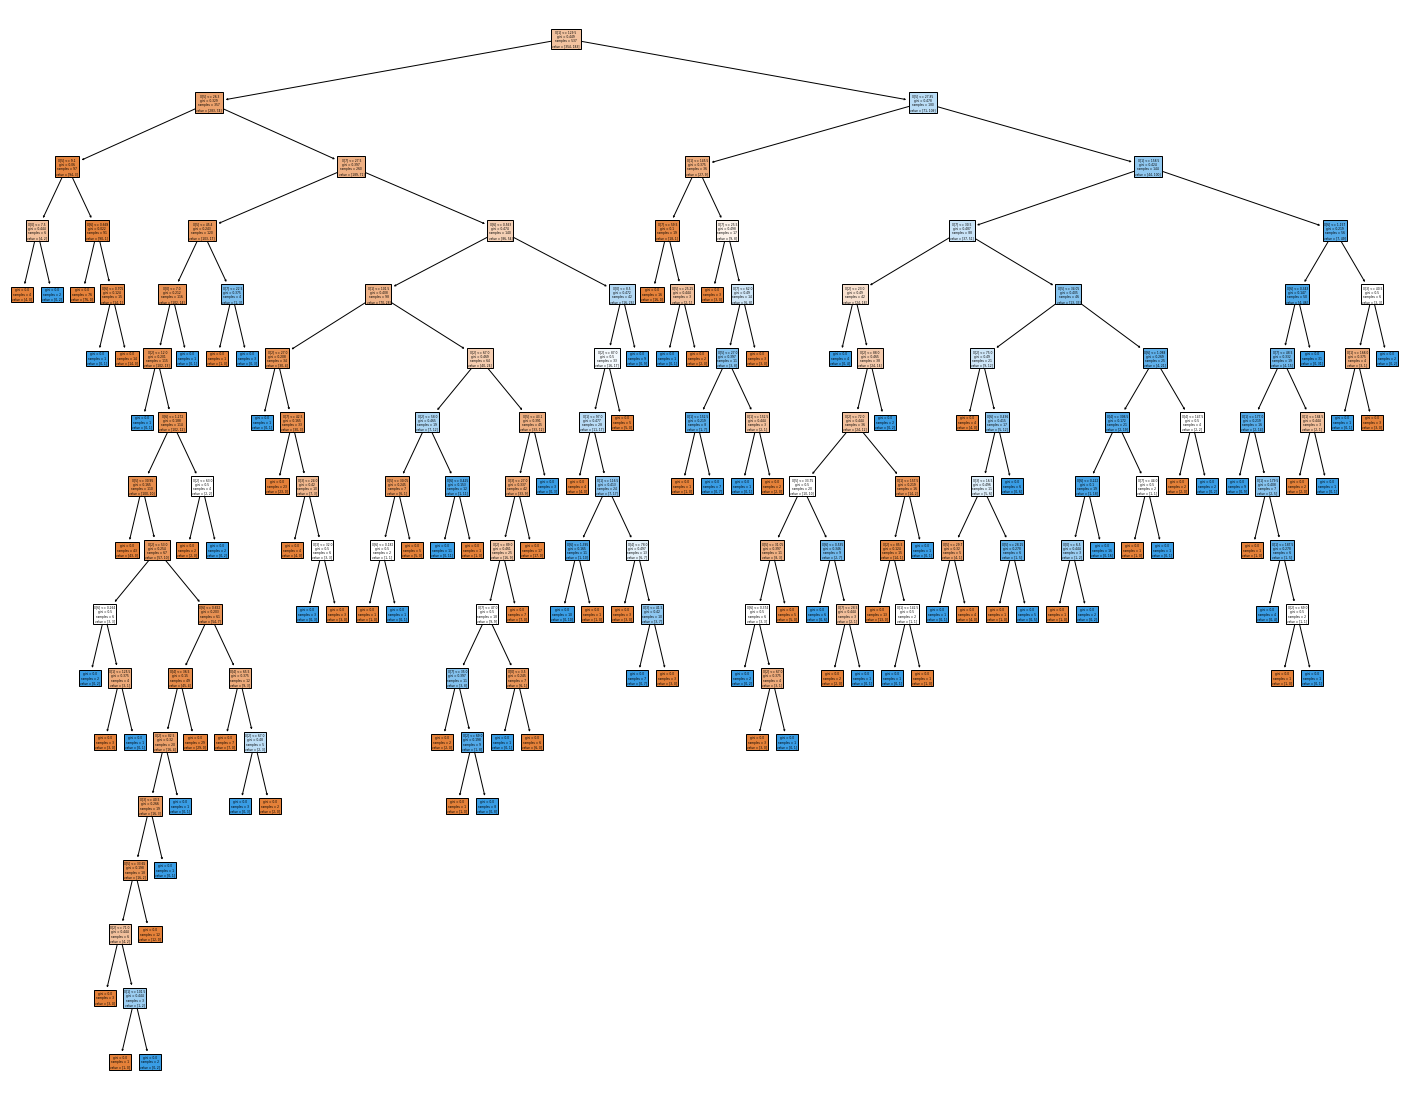

In [10]:
from sklearn import tree

fig = plt.figure(figsize=(25, 20))
tree.plot_tree(clf, filled=True)

#### Decision Tree dengan Pruning

In [11]:
# Create Decision Tree Classifier Object
clf_p = DecisionTreeClassifier(criterion="entropy", max_depth=3)

# Train Decision Tree Classifier
clf_p = clf_p.fit(X_train, y_train)

# Predict the response for test dataset
y_pred_p = clf_p.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:", metrics.accuracy_score(y_test, y_pred_p))

Accuracy: 0.7705627705627706


#### Menampilkan gambar Decision Tree

[Text(0.40053763440860213, 0.9705882352941176, 'X[1] <= 129.5\ngini = 0.449\nsamples = 537\nvalue = [354, 183]'),
 Text(0.1448252688172043, 0.9117647058823529, 'X[5] <= 26.3\ngini = 0.329\nsamples = 357\nvalue = [283, 74]'),
 Text(0.043010752688172046, 0.8529411764705882, 'X[5] <= 9.1\ngini = 0.06\nsamples = 97\nvalue = [94, 3]'),
 Text(0.021505376344086023, 0.7941176470588235, 'X[0] <= 7.5\ngini = 0.444\nsamples = 6\nvalue = [4, 2]'),
 Text(0.010752688172043012, 0.7352941176470589, 'gini = 0.0\nsamples = 4\nvalue = [4, 0]'),
 Text(0.03225806451612903, 0.7352941176470589, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.06451612903225806, 0.7941176470588235, 'X[6] <= 0.669\ngini = 0.022\nsamples = 91\nvalue = [90, 1]'),
 Text(0.053763440860215055, 0.7352941176470589, 'gini = 0.0\nsamples = 76\nvalue = [76, 0]'),
 Text(0.07526881720430108, 0.7352941176470589, 'X[6] <= 0.705\ngini = 0.124\nsamples = 15\nvalue = [14, 1]'),
 Text(0.06451612903225806, 0.6764705882352942, 'gini = 0.0\nsam

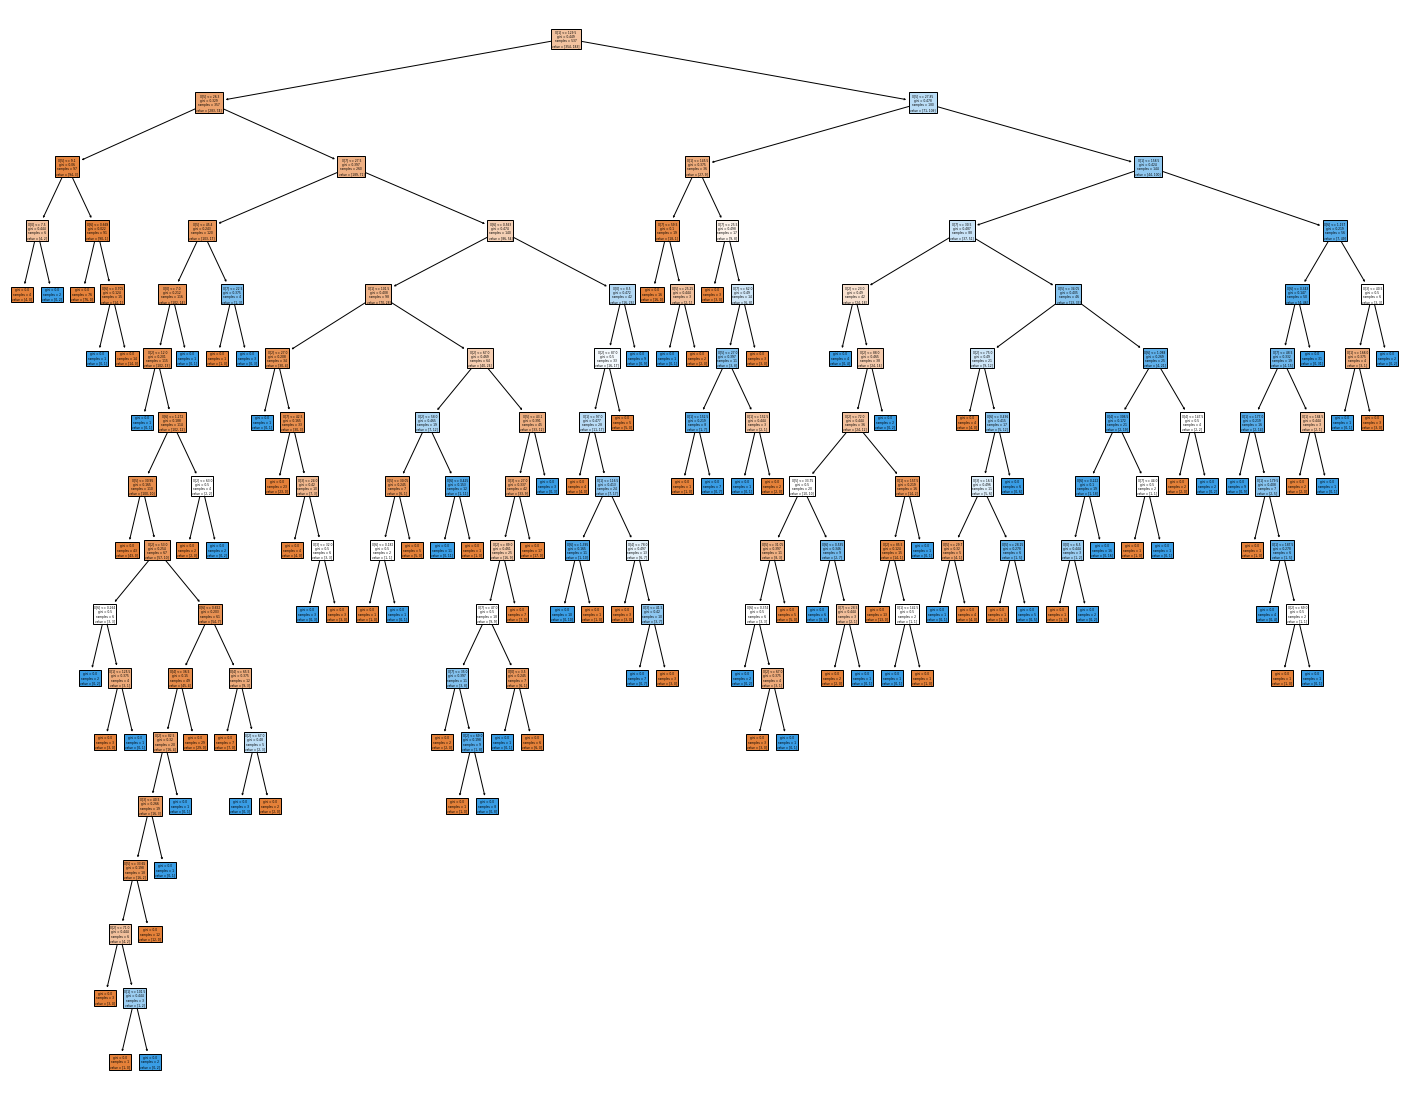

In [12]:
fig = plt.figure(figsize=(25, 20))
tree.plot_tree(clf, filled=True)

#### Random Forest tanpa Pruning

In [13]:
from sklearn.ensemble import RandomForestClassifier

# Create Decision Tree Classifier Object
rf = RandomForestClassifier()

# Train Decision Tree Classifier
rf = rf.fit(X_train, y_train)

# Predict the response for test dataset
y_pred_rf = rf.predict(X_test)

In [14]:
# Hasil Akurasi
print("Accuracy:", metrics.accuracy_score(y_test, y_pred_rf))

Accuracy: 0.7965367965367965


#### Visualisasi Random Forest tanpa Pruning

[Text(0.5076013513513513, 0.9642857142857143, 'X[3] <= 8.5\ngini = 0.455\nsamples = 323\nvalue = [349, 188]'),
 Text(0.18018018018018017, 0.8928571428571429, 'X[5] <= 28.2\ngini = 0.497\nsamples = 112\nvalue = [101, 87]'),
 Text(0.06981981981981981, 0.8214285714285714, 'X[7] <= 29.5\ngini = 0.341\nsamples = 47\nvalue = [61, 17]'),
 Text(0.018018018018018018, 0.75, 'X[7] <= 27.5\ngini = 0.053\nsamples = 21\nvalue = [36, 1]'),
 Text(0.009009009009009009, 0.6785714285714286, 'gini = 0.0\nsamples = 17\nvalue = [29, 0]'),
 Text(0.02702702702702703, 0.6785714285714286, 'X[1] <= 142.5\ngini = 0.219\nsamples = 4\nvalue = [7, 1]'),
 Text(0.018018018018018018, 0.6071428571428571, 'gini = 0.0\nsamples = 3\nvalue = [7, 0]'),
 Text(0.036036036036036036, 0.6071428571428571, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.12162162162162163, 0.75, 'X[6] <= 0.709\ngini = 0.476\nsamples = 26\nvalue = [25, 16]'),
 Text(0.09009009009009009, 0.6785714285714286, 'X[1] <= 123.5\ngini = 0.456\nsamples = 2

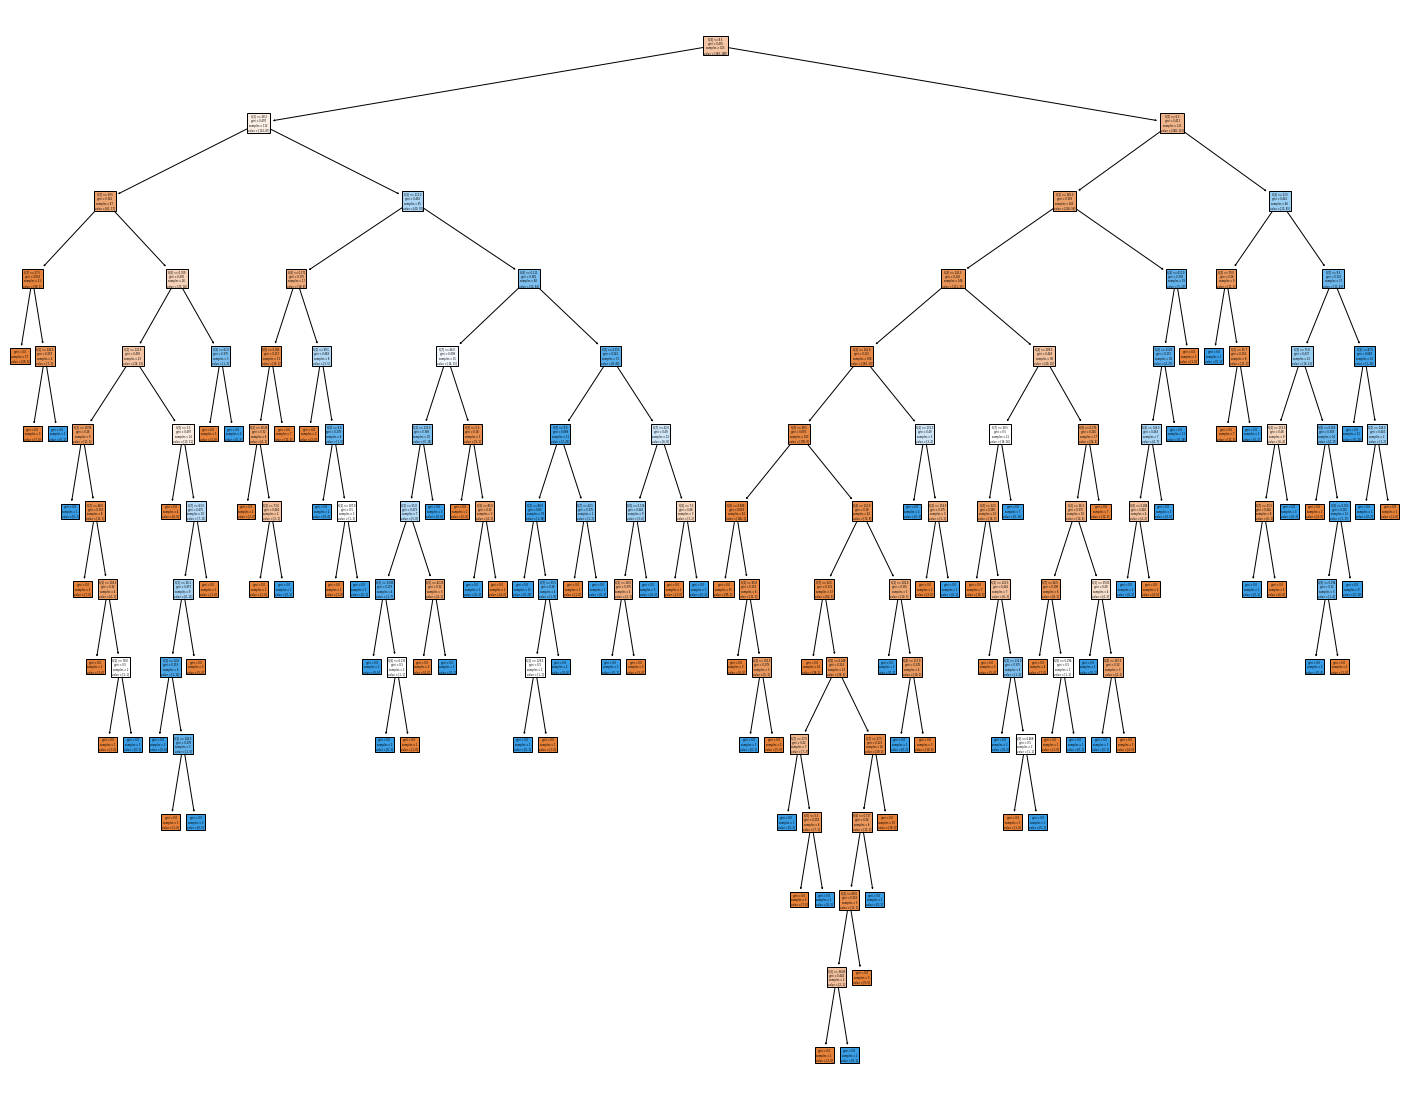

In [16]:
fig = plt.figure(figsize=(25, 20))
tree.plot_tree(rf.estimators_[0], filled=True)

#### Random Forest Menggunakan Pruning

In [17]:
# Create Decision Tree Classifier Object
rf_p = RandomForestClassifier(criterion="entropy", max_depth=3, max_leaf_nodes=5, class_weight=None)

# Train Decision Tree Classifier
rf_p = rf_p.fit(X_train, y_train)

# Predict the response for test dataset
y_pred_rfp = rf_p.predict(X_test)

print("Accuracy:", metrics.accuracy_score(y_test, y_pred_rfp))

Accuracy: 0.7662337662337663


[Text(0.5555555555555556, 0.875, 'X[3] <= 22.5\nentropy = 0.883\nsamples = 349\nvalue = [375, 162]'),
 Text(0.3333333333333333, 0.625, 'X[1] <= 112.5\nentropy = 0.76\nsamples = 174\nvalue = [213, 60]'),
 Text(0.2222222222222222, 0.375, 'X[0] <= 5.5\nentropy = 0.418\nsamples = 90\nvalue = [141, 13]'),
 Text(0.1111111111111111, 0.125, 'entropy = 0.171\nsamples = 71\nvalue = [115, 3]'),
 Text(0.3333333333333333, 0.125, 'entropy = 0.852\nsamples = 19\nvalue = [26, 10]'),
 Text(0.4444444444444444, 0.375, 'entropy = 0.968\nsamples = 84\nvalue = [72, 47]'),
 Text(0.7777777777777778, 0.625, 'X[7] <= 23.5\nentropy = 0.962\nsamples = 175\nvalue = [162, 102]'),
 Text(0.6666666666666666, 0.375, 'entropy = 0.439\nsamples = 39\nvalue = [50, 5]'),
 Text(0.8888888888888888, 0.375, 'entropy = 0.996\nsamples = 136\nvalue = [112, 97]')]

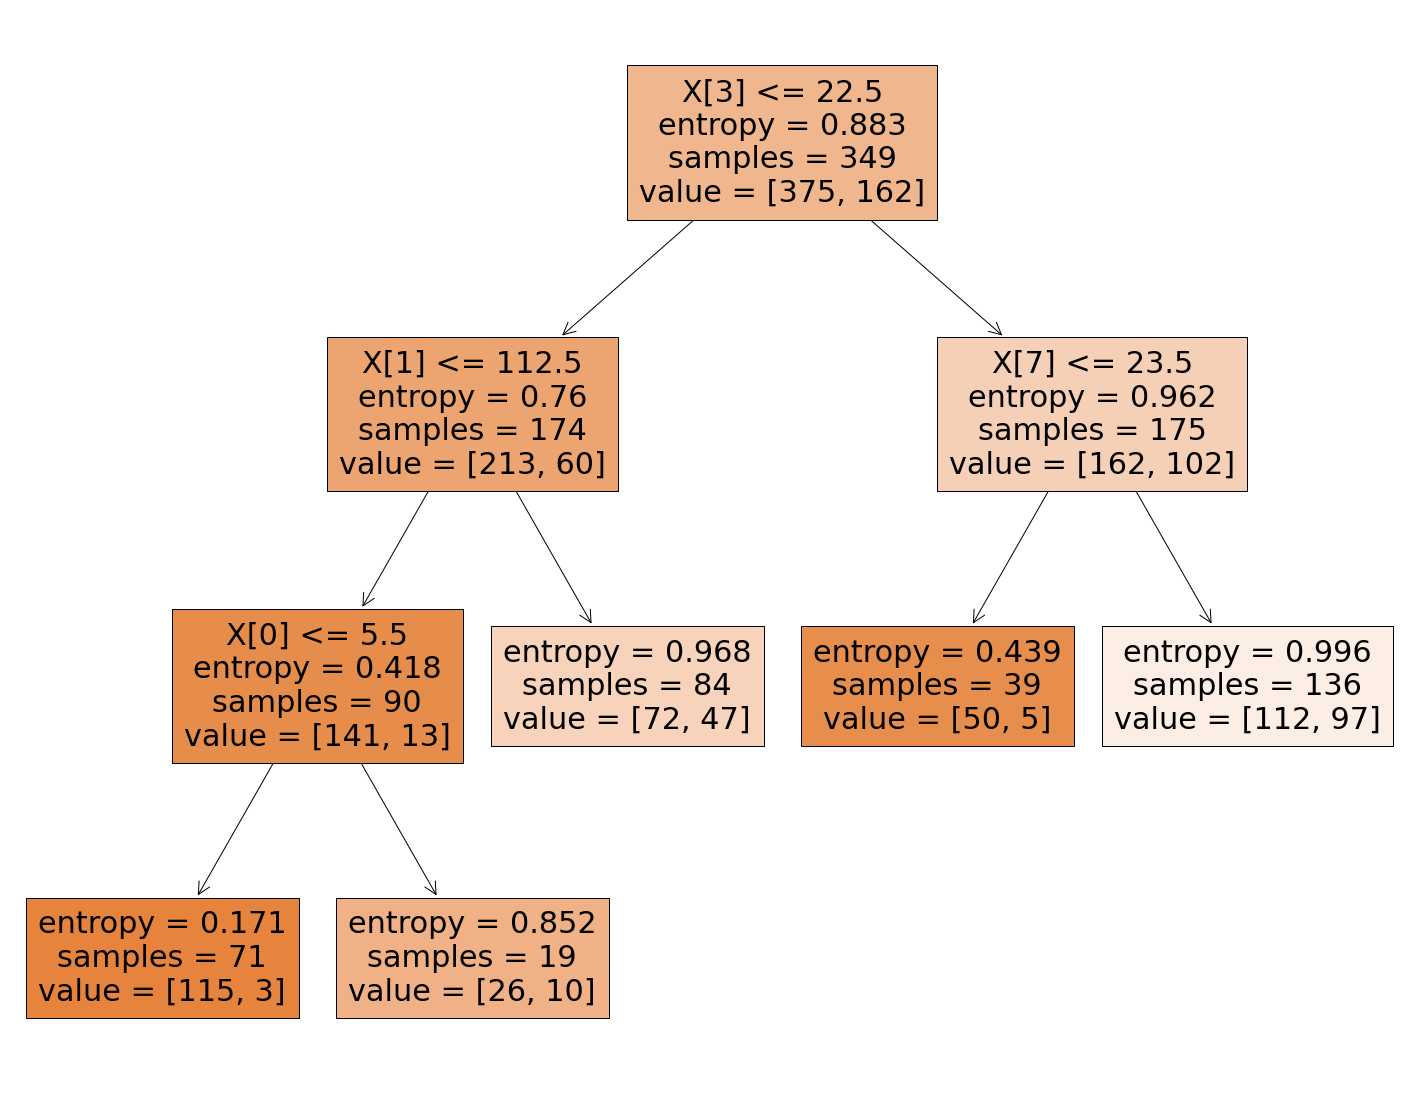

In [18]:
fig = plt.figure(figsize=(25, 20))
tree.plot_tree(rf_p.estimators_[0], filled=True)

### Feature Importance

Feature: 0, Score: 0.08885
Feature: 1, Score: 0.24258
Feature: 2, Score: 0.10258
Feature: 3, Score: 0.07234
Feature: 4, Score: 0.07379
Feature: 5, Score: 0.16413
Feature: 6, Score: 0.12895
Feature: 7, Score: 0.12678


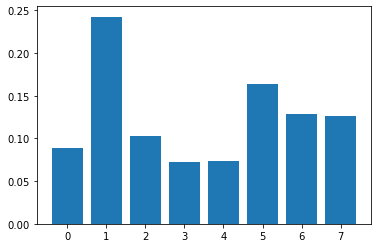

In [19]:
importance = rf.feature_importances_

for i, v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i, v))

# Menampilkan plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

#### Split Data

In [21]:
# Split dataset in features and target variable
importance_cols = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']

X1 = dataset[importance_cols] # Features
y1 = dataset['Outcome'] # Target Variable

# Split dataset into training set and test set
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.3, random_state=1)

In [26]:
# Create Decision Tree Classifier Object
rf1 = RandomForestClassifier()

# Train Decision Tree Classifier
rf1 = rf1.fit(X1_train, y1_train)

# Predict the response for test dataset
y1_pred = rf1.predict(X1_test)

print("Accuracy:", metrics.accuracy_score(y1_test, y1_pred))

Accuracy: 0.8051948051948052


In [27]:
# Terdapat kenaikan akurasi setelah menggunakan feature importance
# Berikut ini merupakan berbagai akurasi Random Forest yang telah dilakukan

print("Accuracy of Random Forest without Pruning:", metrics.accuracy_score(y_test, y_pred_rf))
print("Accuracy of Random Forest with Pruning:", metrics.accuracy_score(y_test, y_pred_rfp))
print("Accuracy of Random Forest with Feature Importance:", metrics.accuracy_score(y1_test, y1_pred))

Accuracy of Random Forest without Pruning: 0.7965367965367965
Accuracy of Random Forest with Pruning: 0.7662337662337663
Accuracy of Random Forest with Feature Importance: 0.8051948051948052
